In [1]:
import pandas_datareader as pdr
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def get_input_feature(ticker, start_date, end_date):
    
    return pdr.get_data_yahoo(ticker,start_date, end_date)

In [3]:
###################################
# make input features
###################################
# read IVV stock data
import datetime

now = datetime.datetime.now()
end_date = now.strftime("%Y-%m-%d")
print end_date
                        
ivv = get_input_feature('IVV','2016-01-01', end_date)
gld = get_input_feature('GLD','2016-01-01', end_date)

2017-12-13


In [18]:
# nomalize Adj close price
# nomalize Volume
#print ivv.head()
nm_ivv = ivv.copy(deep=True)
nm_ivv['Adj Close'] = nm_ivv['Adj Close']/nm_ivv['Adj Close'][0]
nm_ivv['Volume'] = nm_ivv['Volume']/nm_ivv['Volume'].mean()
nm_ivv['Open'] = (nm_ivv['Close']-nm_ivv['Open'])/nm_ivv['Open']
nm_ivv['High'] = (nm_ivv['High']-nm_ivv['Low'])/nm_ivv['Low']
nm_ivv = nm_ivv.rename(columns = {'Open':'Change'})
nm_ivv = nm_ivv.rename(columns = {'High':'Maxofday'})
#print nm_ivv.head()

#print gld.head()
nm_gld = gld.copy(deep=True)
nm_gld['Adj Close'] = nm_gld['Adj Close']/nm_gld['Adj Close'][0]
nm_gld['Volume'] = nm_gld['Volume']/nm_gld['Volume'].mean()
#print nm_gld.head()


prices = nm_ivv['Adj Close']
features = nm_ivv.drop(['Close', 'Low'], axis = 1)

# Rolling Mean 10 days
rm10_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=10)
rm10_ivv_ = pd.DataFrame(rm10_ivv)
rm10_ivv_ = rm10_ivv_.rename(columns = {'Adj Close':'RM10'})

# Rolling Mean 20 days
rm20_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=20)
rm20_ivv_ = pd.DataFrame(rm20_ivv)
rm20_ivv_ = rm20_ivv_.rename(columns = {'Adj Close':'RM20'})
#print "rm20_ivv_.dtypes", rm20_ivv_.dtypes
#print rm20_ivv_.tail()

# Rolling Mean 40 days
rm40_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=40)
rm40_ivv_ = pd.DataFrame(rm40_ivv)
rm40_ivv_ = rm40_ivv_.rename(columns = {'Adj Close':'RM40'})


#print gld.head()
gold = nm_gld.drop(['Open', 'High', 'Close', 'Low', 'Volume'], axis = 1)
gold = gold.rename(columns = {'Adj Close':'GLD'})
#print gold.head()
#print "gold.dtypes", gold.dtypes

features = features.join(gold, how='inner')
features = features.join(rm10_ivv_, how='inner')
features = features.join(rm20_ivv_, how='inner')
features = features.join(rm40_ivv_, how='inner')

print features.head()


              Change  Maxofday  Adj Close    Volume       GLD  RM10  RM20  \
Date                                                                        
2016-01-04  0.002631  0.012125   1.000000  2.016095  1.000000   NaN   NaN   
2016-01-05  0.000544  0.009152   1.002079  1.425954  1.002819   NaN   NaN   
2016-01-06  0.002057  0.012338   0.988960  1.489472  1.017300   NaN   NaN   
2016-01-07 -0.006673  0.019684   0.965297  2.044548  1.031684   NaN   NaN   
2016-01-08 -0.016876  0.022283   0.954604  2.412838  1.027116   NaN   NaN   

            RM40  
Date              
2016-01-04   NaN  
2016-01-05   NaN  
2016-01-06   NaN  
2016-01-07   NaN  
2016-01-08   NaN  


/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()


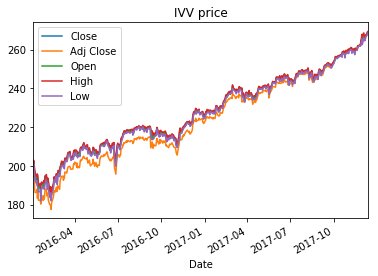

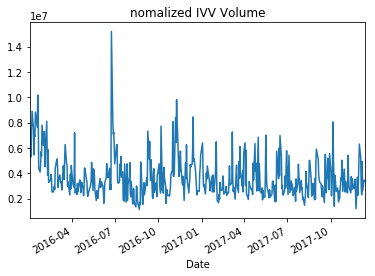

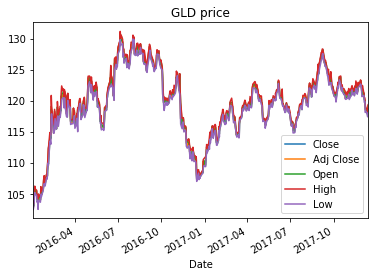

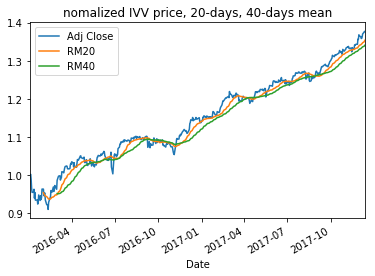

In [19]:
##################################
# check input features using graph
#################################
# plot IVV stock 
import pandas as pd 
import matplotlib.pyplot as plt

ivv[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='IVV price')
plt.show()

ivv['Volume'].plot(title='nomalized IVV Volume')
plt.show()

gld[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='GLD price')
plt.show()

features[['Adj Close', 'RM20', 'RM40']].plot(title='nomalized IVV price, 20-days, 40-days mean')
plt.show()


In [20]:
# do linear regression for benchmark

from pandas import Series, DataFrame, Panel
from sklearn.model_selection import train_test_split
X_train = features[65:-50]
y_train = prices[70:-45]
X_test = features[-50:-5]
y_test = prices[-45:]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

#print X_train.head()
#print X_train[:,1]
#print y_train.head()

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

Training set has 377 samples.
Testing set has 45 samples.


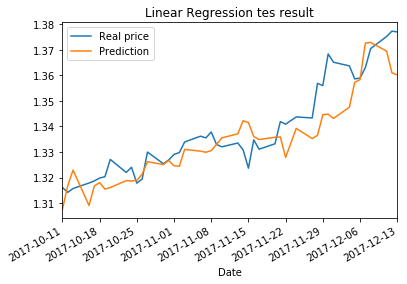

('Coefficients: \n', array([ 0.01326047,  0.04727002,  0.86664223,  0.00674037, -0.00479599,
        0.02059052,  0.00913003,  0.10895331]))
Mean squared error: 0.00
Variance score: 0.74


In [21]:
# plot linear regression result

LR_result = pd.DataFrame(y_test)
#print LR_result 
#print y_pred
#print y_test

LR_result = LR_result.assign(Prediction = y_pred)
# print LR_result
LR_result = LR_result.rename(columns = {'Adj Close':'Real price'})
LR_result[['Real price','Prediction']].plot(title='Linear Regression tes result')
plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

            Prediction
Date                  
2017-12-14  267.251849
2017-12-15  267.817678
2017-12-16  268.940079
2017-12-17  269.328414
2017-12-18  269.324519


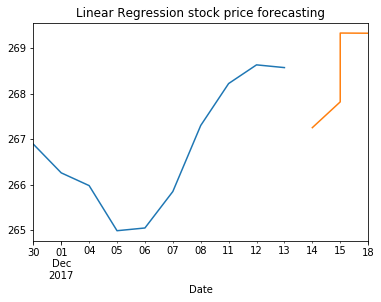

In [22]:
# Predict future 1-week
X_train = features[65:-5]
y_train = prices[70:]
X_future = features[-5:]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_future = regr.predict(X_future)


start_predict_day = now+datetime.timedelta(1)
end_predict_day = now+datetime.timedelta(5)
start_predict_day = start_predict_day.strftime("%Y-%m-%d")
end_predict_day = end_predict_day.strftime("%Y-%m-%d")

days = pd.date_range(start_predict_day, end_predict_day, freq='D')

df = pd.DataFrame({'Date': days, 'Prediction': y_future})
df = df.set_index('Date')
df['Prediction'] = df['Prediction'] * ivv['Adj Close'][0]
print df 

real_prices = prices[-10:] * ivv['Adj Close'][0]
ax = real_prices.plot()
df['Prediction'].plot(title='Linear Regression stock price forecasting', ax = ax)
plt.show()